In [5]:
import config
import dataloader

import pandas as pd

In [7]:
conf = config.Config()
train_df = pd.read_csv(conf.DATA_PATH+'/train.csv')

D:/Downloads/imaterialist-fashion-2020-fgvc7


In [8]:
d = dataloader.Dataset_for_pytorch(conf, train_df)

D:/Downloads/imaterialist-fashion-2020-fgvc7/train/


In [13]:
Images, Ground_Truths, Epoch_Finished = d.get_next_batch(resize=False)

['0cc89a84a6beab91f27e74085efa2d26' 'f241d5d9463a04b5b7fb4f87f38dec19'
 '4103ae509d6d30c5c866f98c602236d4' 'c04a4c717db7bf85b66815658ec4dabb'
 'ffe31be462c0f3fa586171f7df788887' 'c6e7163adcb5992f36d7527ae241690d'
 '22722cf5130f94811e8bfd189c435e87' '7e7d2de5af00efbd7aa00760c5369ddf']


# Demo

In [14]:
len(Images), Images[0]

(8, array([[[0.93333333, 0.93333333, 0.93333333],
         [0.93333333, 0.93333333, 0.93333333],
         [0.93333333, 0.93333333, 0.93333333],
         ...,
         [0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961]],
 
        [[0.93333333, 0.93333333, 0.93333333],
         [0.93333333, 0.93333333, 0.93333333],
         [0.93333333, 0.93333333, 0.93333333],
         ...,
         [0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961]],
 
        [[0.93333333, 0.93333333, 0.93333333],
         [0.93333333, 0.93333333, 0.93333333],
         [0.93333333, 0.93333333, 0.93333333],
         ...,
         [0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961]],
 
        ...,
 
        [[0.97647059, 0.97647059, 0.97647059],
         [0.97647059, 0.97647059, 0.97

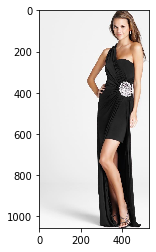

In [16]:
import matplotlib.pyplot as plt
plt.imshow(Images[0])

In [17]:
len(Ground_Truths), Ground_Truths[0]

(8, {'boxes': array([[ 356,  983,  381, 1037],
         [ 391,  954,  447, 1054],
         [ 388,  345,  450,  423],
         [ 371,  160,  458,  267],
         [ 281,  160,  495, 1052]]),
  'labels': array([23, 23, 37, 33, 10]),
  'masks': array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
    

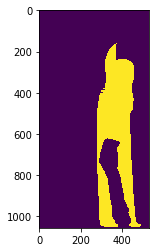

In [22]:
plt.imshow(Ground_Truths[0]['masks'][4])

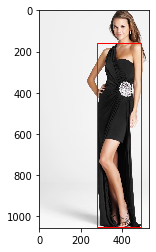

In [26]:
from matplotlib.patches import Rectangle
plt.imshow(Images[0])
plt.gca().add_patch(Rectangle((Ground_Truths[0]['boxes'][4][0], Ground_Truths[0]['boxes'][4][1]),
                              Ground_Truths[0]['boxes'][4][2]-Ground_Truths[0]['boxes'][4][0],
                              Ground_Truths[0]['boxes'][4][3]-Ground_Truths[0]['boxes'][4][1],
                              linewidth=1,edgecolor='r',facecolor='none'))

# Model

In [49]:
import torchvision
import torch.nn as nn
import copy

In [50]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
myModel = copy.deepcopy(model)

# The model has 4 main parts
<ol>
<li>transform(GeneralizedRCNNTransform)</li> 
<li>backbone(BackbonewithFPN and FPN-FeaturePyramidNetwork)</li>
<li>rpn (RegionProposalNetwork)</li>
<li>roi_heads - RoIHeads</li>
</ol>

We need to change roi_heads as it has TwoMLPHead, FastRCNNPredictor, MaskRCNNHeads, MaskRCNNPredictor ()

In [51]:
model.rpn.eval() #model.backbone.eval()

RegionProposalNetwork(
  (anchor_generator): AnchorGenerator()
  (head): RPNHead(
    (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (cls_logits): Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))
    (bbox_pred): Conv2d(256, 12, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [52]:
model.roi_heads.eval()

RoIHeads(
  (box_roi_pool): MultiScaleRoIAlign()
  (box_head): TwoMLPHead(
    (fc6): Linear(in_features=12544, out_features=1024, bias=True)
    (fc7): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (box_predictor): FastRCNNPredictor(
    (cls_score): Linear(in_features=1024, out_features=91, bias=True)
    (bbox_pred): Linear(in_features=1024, out_features=364, bias=True)
  )
  (mask_roi_pool): MultiScaleRoIAlign()
  (mask_head): MaskRCNNHeads(
    (mask_fcn1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU(inplace=True)
    (mask_fcn2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2): ReLU(inplace=True)
    (mask_fcn3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3): ReLU(inplace=True)
    (mask_fcn4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu4): ReLU(inplace=True)
  )
  (mask_predictor): MaskRCNNPredictor(
    (conv5_mask): ConvTr

In [55]:
model.roi_heads.eval()
myModel.roi_heads.box_predictor.cls_score = nn.Linear(1024, conf.NO_OF_CLASSES)
myModel.roi_heads.box_predictor.bbox_pred = nn.Linear(1024, 4*conf.NO_OF_CLASSES)
myModel.roi_heads.mask_predictor.mask_fcn_logits = nn.Conv2d(256, conf.NO_OF_CLASSES, kernel_size=(1, 1), stride=(1, 1))
myModel.roi_heads.eval()

RoIHeads(
  (box_roi_pool): MultiScaleRoIAlign()
  (box_head): TwoMLPHead(
    (fc6): Linear(in_features=12544, out_features=1024, bias=True)
    (fc7): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (box_predictor): FastRCNNPredictor(
    (cls_score): Linear(in_features=1024, out_features=46, bias=True)
    (bbox_pred): Linear(in_features=1024, out_features=184, bias=True)
  )
  (mask_roi_pool): MultiScaleRoIAlign()
  (mask_head): MaskRCNNHeads(
    (mask_fcn1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU(inplace=True)
    (mask_fcn2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2): ReLU(inplace=True)
    (mask_fcn3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3): ReLU(inplace=True)
    (mask_fcn4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu4): ReLU(inplace=True)
  )
  (mask_predictor): MaskRCNNPredictor(
    (conv5_mask): ConvTr